In [1]:
# Imports
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier, Pool, cv
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import classification_report
from catboost.utils import get_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import pickle

### Load model

In [2]:
model = CatBoostClassifier(
            custom_loss=['Accuracy'],
            random_seed=42,
            auto_class_weights = 'Balanced',
            task_type="GPU"
            )
trained_model = 'taxonomy_model_subset_50000.json'
if os.path.exists(trained_model):
    model.load_model(trained_model, format='json')

### Load test dataset
This set is subset of taxonomy, first 50000 rows

In [3]:
test_pool = Pool("../data/taxonomy_dataset_test_subset_removed_low_freq_50000.tsv", 
               column_description="../data/columns_description.cd")

Get features and labels

In [4]:
X_test = test_pool.get_features()
y_test = test_pool.get_label()

### Get shap values

In [5]:
explainer_model = shap.TreeExplainer(model)

Cell below calculates shap values of model, this step takes 5.3 hrs and 700G CPU memory.

In [6]:
# %%time
# shap_values = explainer_model.shap_values(X_test)
# with open('shap_values.pkl', 'wb') as f:
#     pickle.dump(shap_values, f)

CPU times: user 5h 18min 17s, sys: 36min 25s, total: 5h 54min 43s

Wall time: 5h 30min 53s

In [7]:
%%time
shap_values = pickle.load( open('shap_values.pkl', "rb" ) )

CPU times: user 26.8 s, sys: 2min 53s, total: 3min 19s
Wall time: 3min 22s


### Load feature name

In [8]:
with open('../data/feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)
predictions = model.predict(X_test)

### Plot shap summary

CPU times: user 40min 28s, sys: 28min 15s, total: 1h 8min 44s
Wall time: 4min 8s


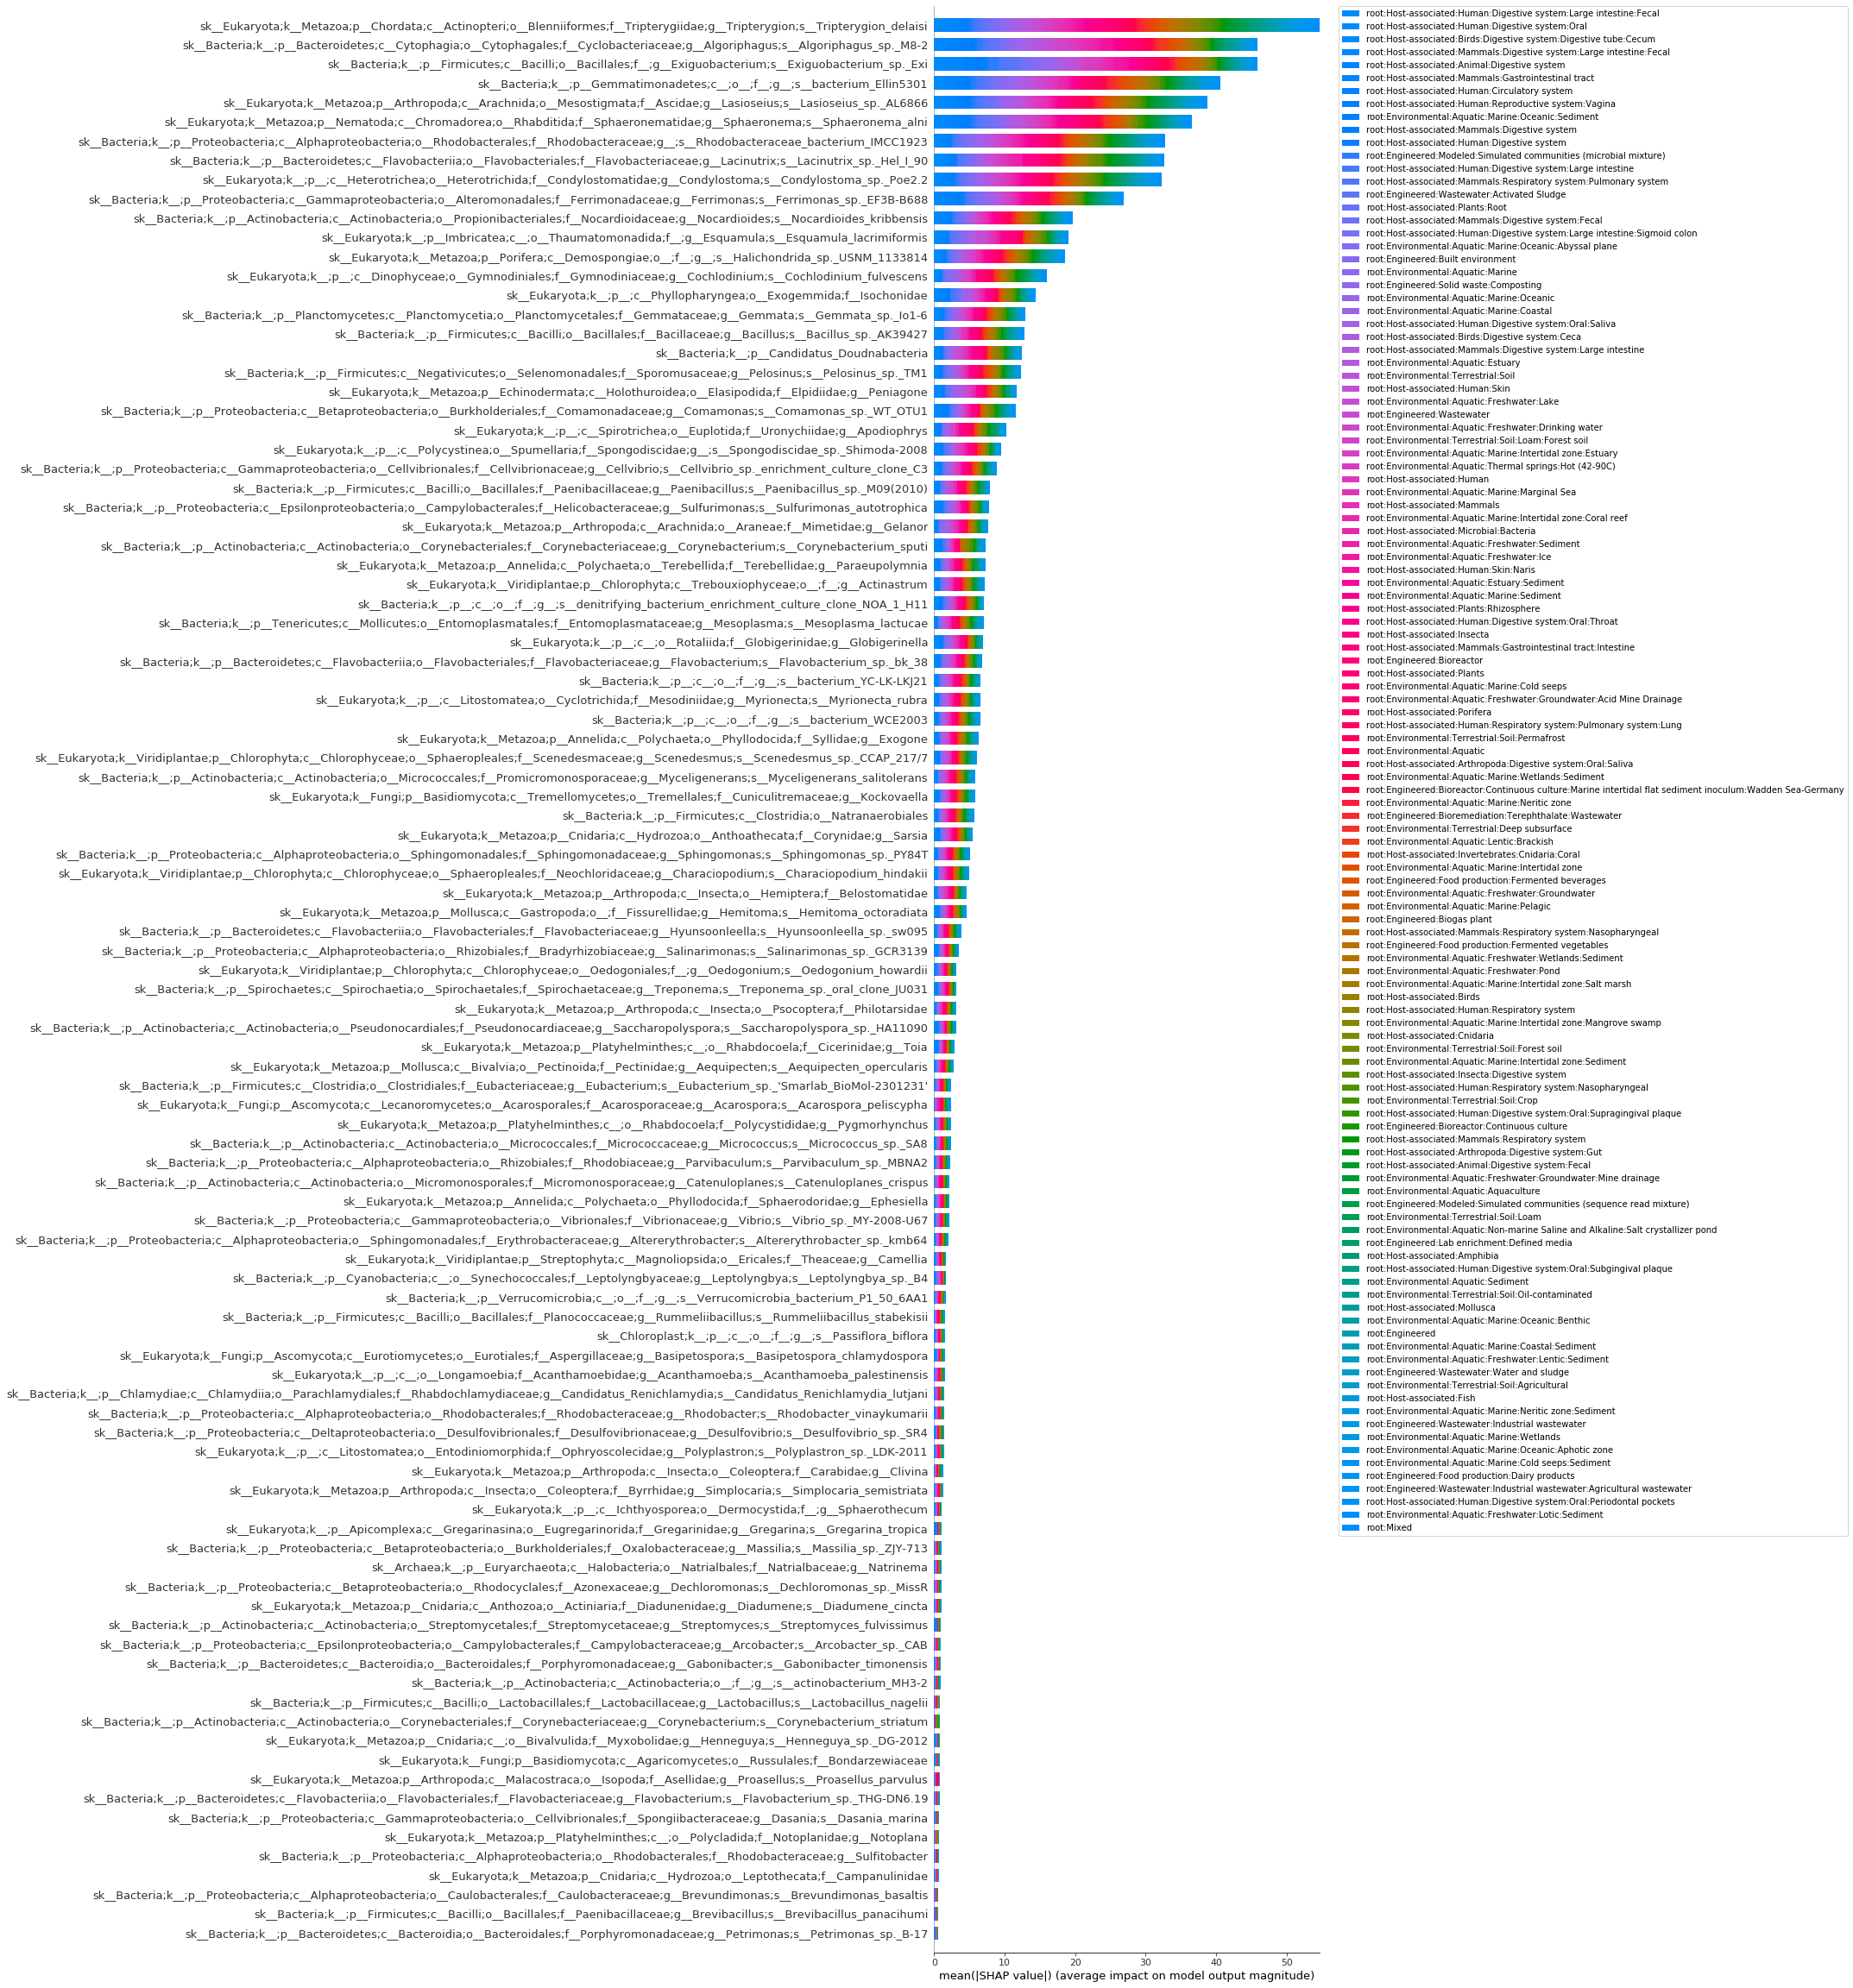

In [9]:
%%time
shap.summary_plot(shap_values, X_test, feature_names = feature_names, max_display=100, class_names=model.classes_,show=False)
f = plt.gcf()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('shap_summary_50000_100.png',bbox_inches='tight')

### first 10 feature names

In [10]:
feature_names[:10]

['exptype',
 'sk__Eukaryota;k__Metazoa;p__Nemertea;c__Anopla;o__Heteronemertea;f__Lineidae;g__Zygeupolia;s__Zygeupolia_rubens',
 'sk__Eukaryota;k__;p__;c__Colpodea;o__Bryophryida',
 'sk__Bacteria;k__;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__Pseudomonas_reactans',
 'sk__Eukaryota;k__;p__;c__Labyrinthulomycetes;o__;f__Thraustochytriaceae;g__Aplanochytrium;s__Aplanochytrium_sp._SEK_603',
 'sk__Bacteria;k__;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Proteinivoraceae;g__Anaerobranca',
 'sk__Bacteria;k__;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Oceanicola;s__Oceanicola_sp._HL-35',
 'sk__Bacteria;k__;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus;s__Bacillus_sp._1087',
 'sk__Bacteria;k__;p__;c__;o__;f__;g__;s__denitrifying_bacterium_enrichment_culture_clone_NOA_0_E5',
 'sk__Eukaryota;k__Metazoa;p__Nematoda;c__Chromadorea;o__Rhabditida;f__Rhabditidae;g__Caenorhabditis;s__C